In [1]:
from empca_residuals import *
from apogee.tools import bitmask as bm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
rc12 = empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [3]:
rc13 = empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4800
Found good limits
Data key: done
Done getting filter information


In [4]:
crossover13 = (np.array([i for i in range(len(rc13.matchingData['APOGEE_ID'])) if rc13.matchingData['APOGEE_ID'][i] in rc12.matchingData['APOGEE_ID']]),)
crossover12 = (np.array([i for i in range(len(rc12.matchingData['APOGEE_ID'])) if rc12.matchingData['APOGEE_ID'][i] in rc13.matchingData['APOGEE_ID']]),)

In [5]:
rc12mask = np.copy(rc12._maskHere[crossover12])
rc13mask = np.copy(rc13._maskHere[crossover13])

In [7]:
rc13._maskHere = rc12mask
rc13.spectra = rc13.spectra[crossover13]
rc13.spectra_errs = rc13.spectra_errs[crossover13]
rc13.teff = rc13.teff[crossover13]
rc13.logg = rc13.logg[crossover13]
rc13.fe_h = rc13.fe_h[crossover13]
rc13._maskHere = rc13._maskHere | (rc13.spectra/rc13.spectra_errs < 50.)
rc13.applyMask()

In [8]:
rc12._maskHere = rc13mask
rc12.spectra = rc12.spectra[crossover12]
rc12.spectra_errs = rc12.spectra_errs[crossover12]
rc12.teff = rc12.teff[crossover12]
rc12.logg = rc12.logg[crossover12]
rc12.fe_h = rc12.fe_h[crossover12]
rc12._maskHere = rc12._maskHere | (rc12.spectra/rc12.spectra_errs < 50.)
rc12.applyMask()

In [9]:
rc13.findResiduals(gen=True)

In [10]:
Vdata13 = np.ma.var(rc13.residuals)
Vnoise13 = np.ma.mean(rc13.spectra_errs**2)
print 1-Vnoise13/Vdata13, Vnoise13, Vdata13

0.445186771755 5.16475616429e-05 9.30899968018e-05


In [11]:
rc12.findResiduals(gen=True)

In [12]:
Vdata12 = np.ma.var(rc12.residuals)
Vnoise12 = np.ma.mean(rc12.spectra_errs**2)
print 1-Vnoise12/Vdata12, Vnoise12, Vdata12

0.573536294861 4.02171970793e-05 9.4303915186e-05


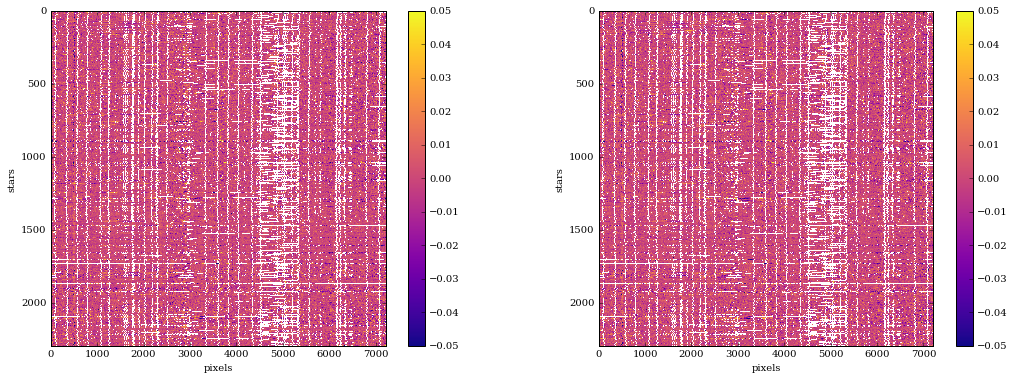

In [13]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals,vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals,vmin=-lim,vmax=lim,cmap='plasma')

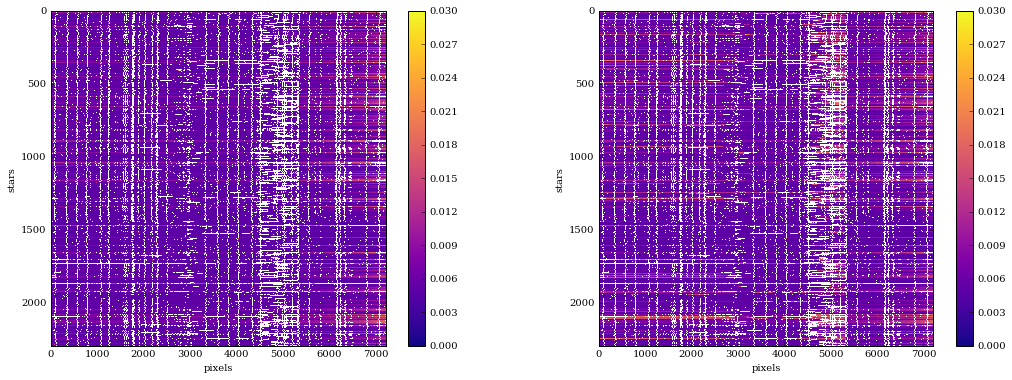

In [14]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs,vmin=0,vmax=lim,cmap='plasma')

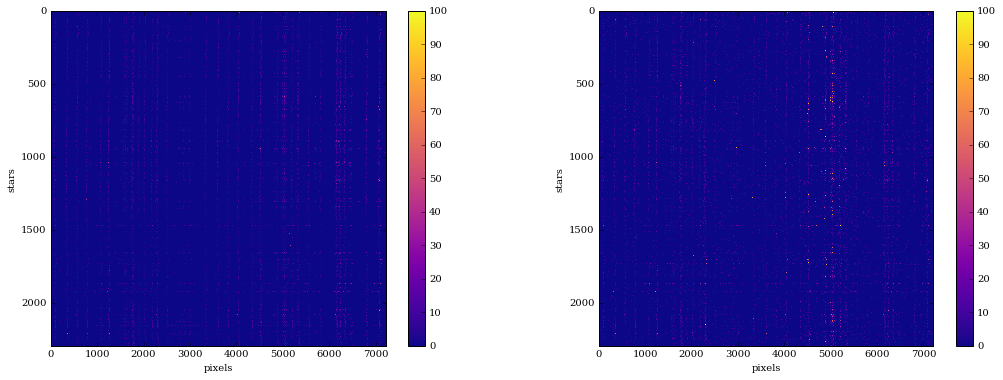

In [15]:
lim = 100
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

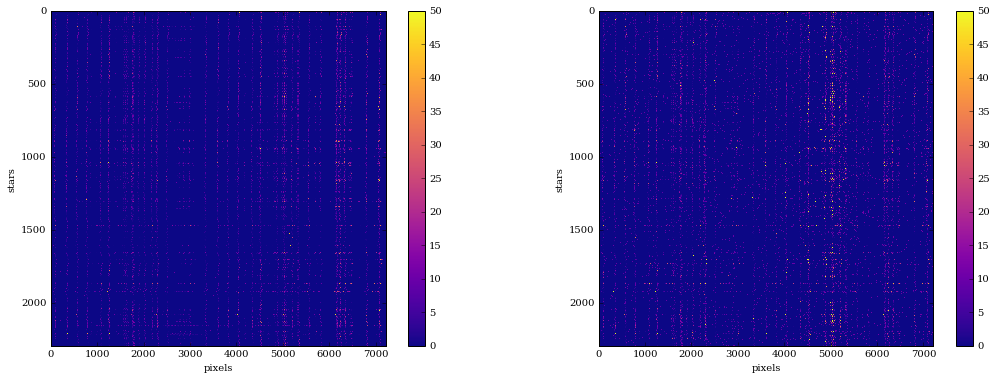

In [17]:
lim = 50
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

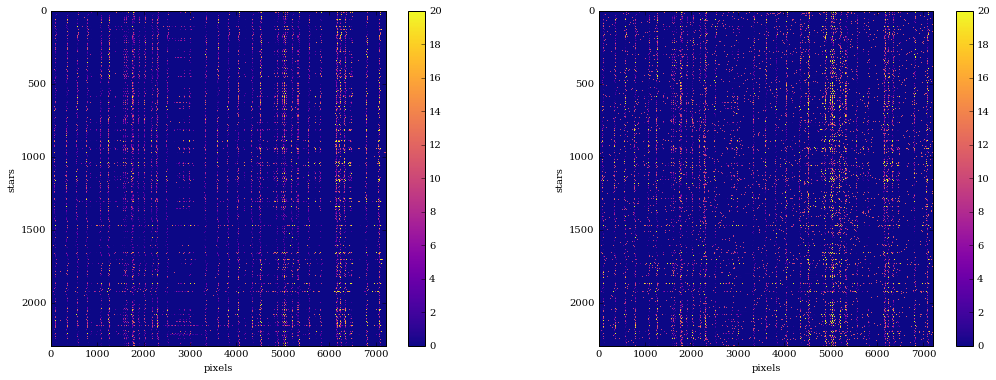

In [18]:
lim = 20
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

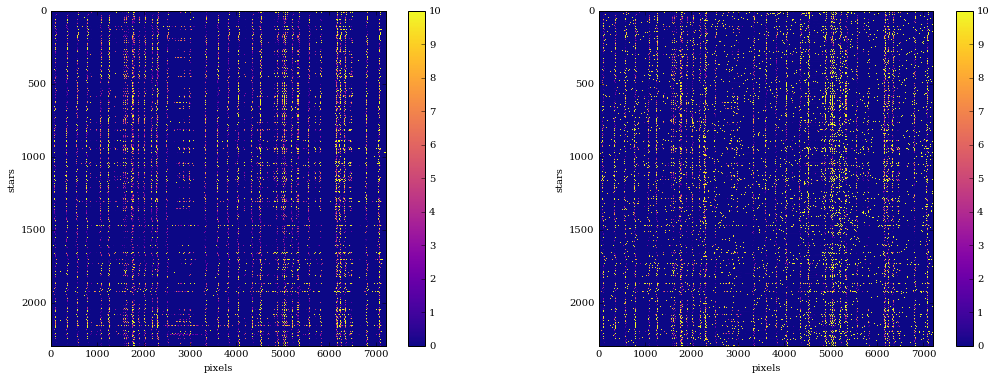

In [19]:
lim = 10
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

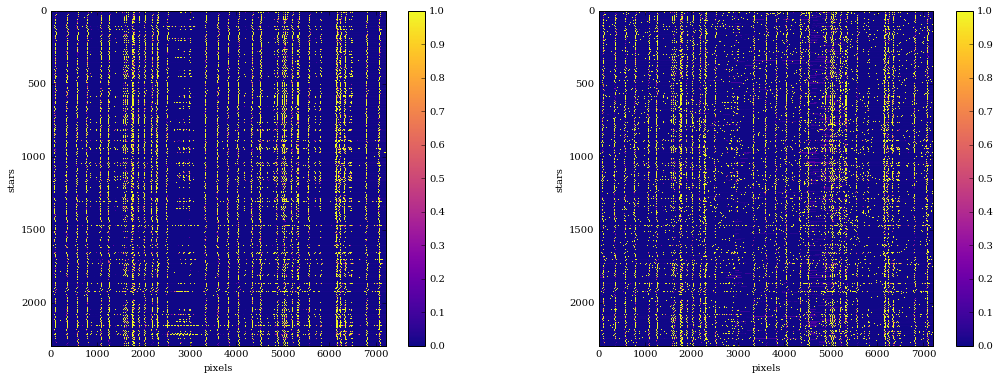

In [20]:
lim = 1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

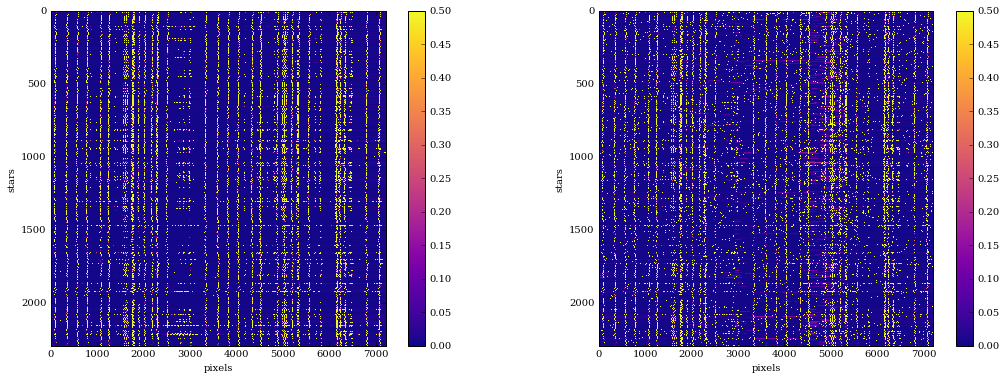

In [21]:
lim = 0.5
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

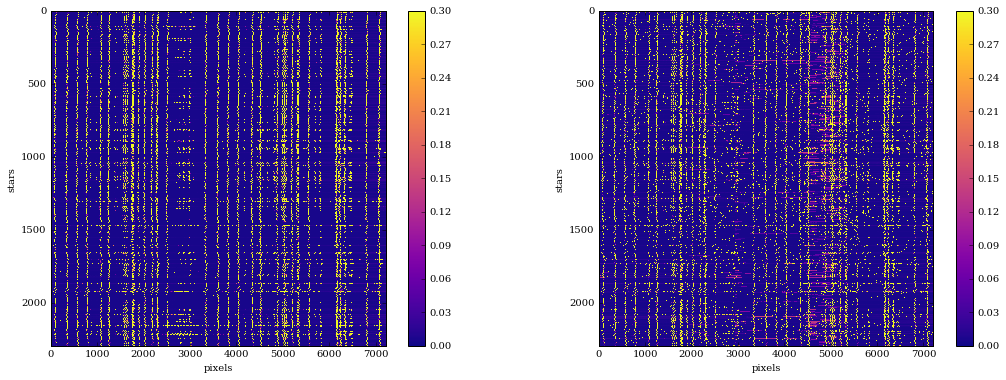

In [24]:
lim = 0.3
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

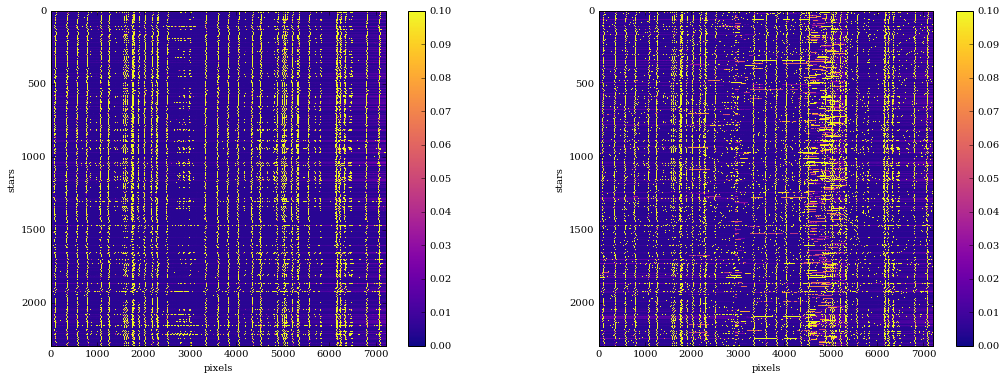

In [26]:
lim = 0.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

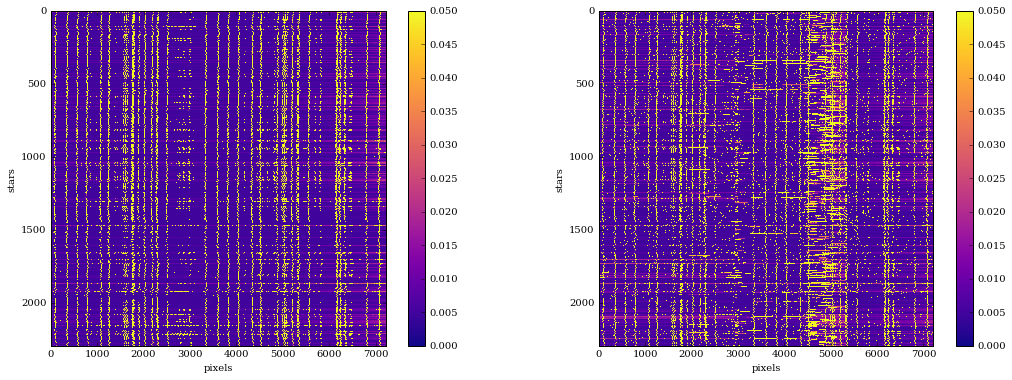

In [27]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')

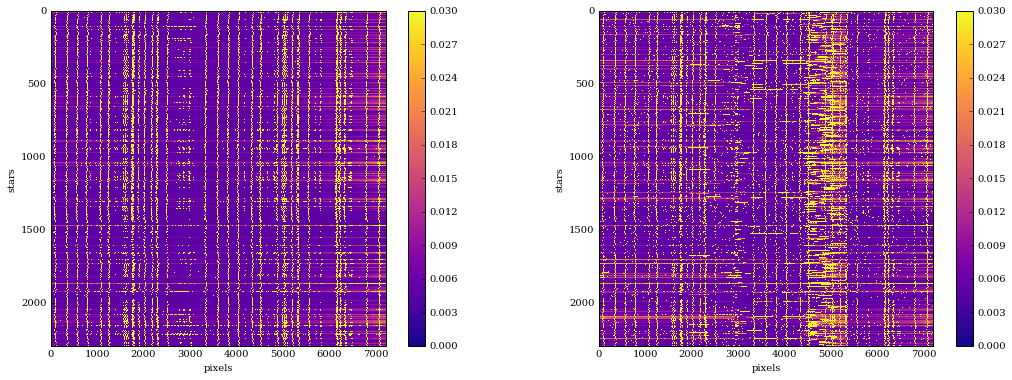

In [28]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs.data,vmin=0,vmax=lim,cmap='plasma')